# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorporated DateTime to timestamp the graphs
from datetime import datetime

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Check the total Cities Count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

params = {
    "appid": weather_api_key,
    "units": units
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create lists to hold the response data
lon =  []
lat = []
humidity = []
temp_max = []
wind = []
clouds = []
date = []
country = []
city_name = []

# Print opening
print("Beginning Data Retrieval")
print("-----------------------------")

# Set up initial values for record and set counts
record_count = 1
set_count = 1
for city in cities:
    try:
        params["q"] = city
        response = requests.get(url, params=params).json()
        print(f"Processing Record {record_count} | {city.title()}")
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
    except KeyError:
        print("City not found. Skipping...")
    
    record_count += 1
    
# Print closing
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


 not found. Skipping...
Processing Record 20 | Ushuaia
Processing Record 21 | Vaini
Processing Record 22 | Pacific Grove
Processing Record 23 | Mar Del Plata
Processing Record 24 | Longyearbyen
Processing Record 25 | Castro
Processing Record 26 | Arlit
Processing Record 27 | Hermanus
Processing Record 28 | Cape Town
Processing Record 29 | Nguiu
City not found. Skipping...
Processing Record 30 | Nome
Processing Record 31 | Miramar
Processing Record 32 | Torbay
Processing Record 33 | Union
Processing Record 34 | Yellowknife
Processing Record 35 | Yulara
Processing Record 36 | Chincha Alta
Processing Record 37 | Nikolskoye
Processing Record 38 | Hokitika
Processing Record 39 | Pagondas
City not found. Skipping...
Processing Record 40 | Tungkang
City not found. Skipping...
Processing Record 41 | Kidal
Processing Record 42 | Jumla
Processing Record 43 | Fukue
Processing Record 44 | Tasiilaq
Processing Record 45 | Port Alfred
Processing Record 46 | Geraldton
Processing Record 47 | Abu Samrah

In [5]:

# Create a dict to convert to a Pandas DataFrame
weather_dict = {
    "City": city_name,
    "Cloudiness" : clouds,
    "Country" : country,            
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : temp_max,
    "Wind Speed" : wind,
}

# Create and display DataFrame info
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Martil,40,MA,1599587792,78,35.62,-5.28,77.00,13.87
1,Kuril'sk,81,RU,1599587792,92,45.23,147.88,62.37,2.26
2,Sabha,0,LY,1599587793,14,27.04,14.43,93.85,13.22
3,Bredasdorp,0,ZA,1599587793,88,-34.53,20.04,60.01,1.99
4,Avarua,100,CK,1599587793,88,-21.21,-159.78,71.60,6.93


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df[weather_df['Humidity'] > 100]
humidity_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Save to a csv file
weather_df.to_csv(output_data_file, index=False)


## Latitude vs. Temperature Plot

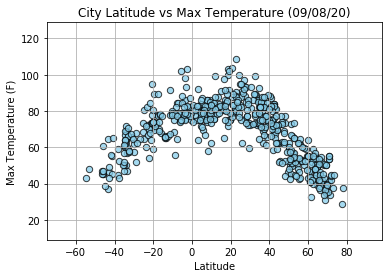

In [9]:
# Build the scatter plot for Latitude vs Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-20), (weather_df["Lat"].max()+20))
plt.ylim((weather_df["Max Temp"].min()-20), (weather_df["Max Temp"].max()+20))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("../Images/LatvTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

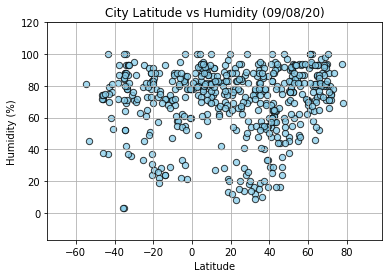

In [10]:
# Build the scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-20), (weather_df["Lat"].max()+20))
plt.ylim((weather_df["Humidity"].min()-20), (weather_df["Humidity"].max()+20))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("../Images/LatvHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

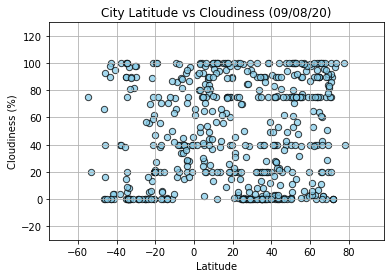

In [11]:
# Build the scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-20), (weather_df["Lat"].max()+20))
plt.ylim((weather_df["Cloudiness"].min()-30), (weather_df["Cloudiness"].max()+30))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("../Images/LatvCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

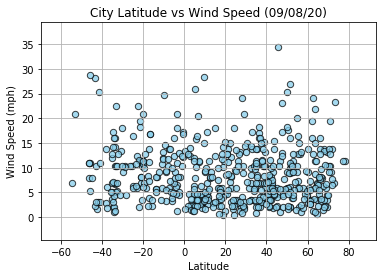

In [12]:

# Build the scatter plot for Latitude vs Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="skyblue", edgecolors="black", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((weather_df["Lat"].min()-15), (weather_df["Lat"].max()+15))
plt.ylim((weather_df["Wind Speed"].min()-5), (weather_df["Wind Speed"].max()+5))


# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.now():%m/%d/%y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set a grid on the plot
plt.grid()

# Save Figure
plt.savefig("../Images/LatvWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames

northern = weather_df.loc[weather_df["Lat"]>=0]
southern = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

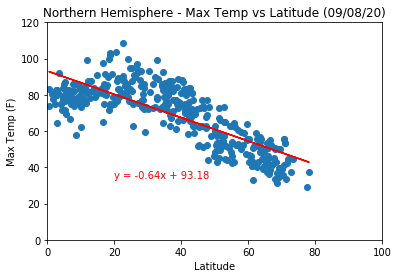

In [14]:
# Calculate the correlation coefficient 
y_axis = northern["Max Temp"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(0,100)
plt.ylim(0,120)
plt.savefig("northern-maxtemp-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

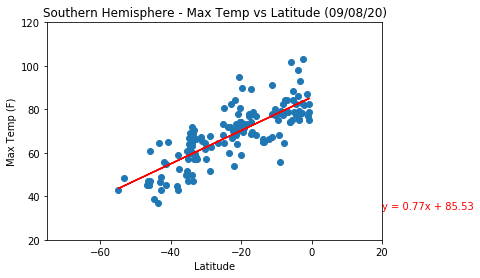

In [15]:
# Calculate the correlation coefficient 
y_axis = southern["Max Temp"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-75,20)
plt.ylim(20,120)
plt.savefig("southern-maxtemp-vs-lat.png",dpi=150)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

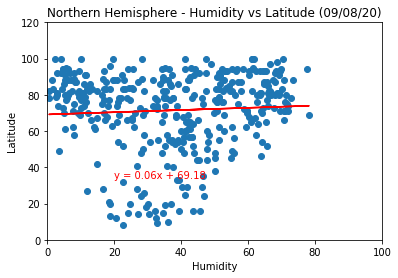

In [16]:
# Calculate the correlation coefficient 
y_axis = northern["Humidity"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere - Humidity vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(0,100)
plt.ylim(0,120)
plt.savefig("northern-humidity-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

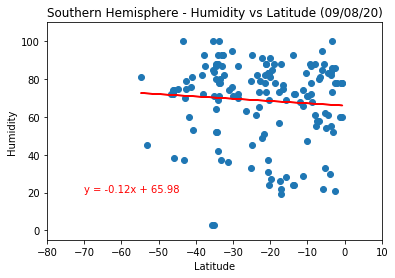

In [17]:
# Calculate the correlation coefficient 
y_axis = southern["Humidity"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere - Humidity vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(-70,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.savefig("southern-humidity-vs-lat.png",dpi=150)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

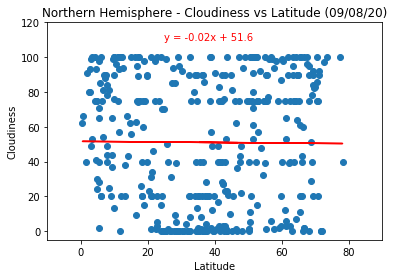

In [18]:
# Calculate the correlation coefficient 
y_axis = northern["Cloudiness"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere - Cloudiness vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(25,110),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-10,90)
plt.ylim(-5,120)
plt.savefig("northern-cloudiness-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

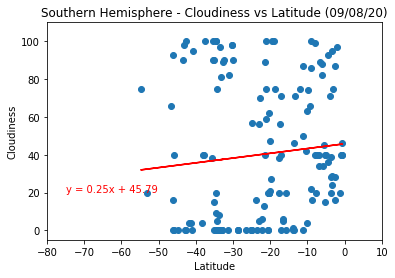

In [19]:
# Calculate the correlation coefficient 
y_axis = southern["Cloudiness"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere - Cloudiness vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(-75,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.savefig("southern-cloudiness-vs-lat.png",dpi=150)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

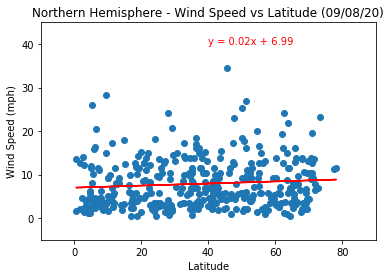

In [20]:
# Calculate the correlation coefficient 
y_axis = northern["Wind Speed"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere - Wind Speed vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(40,40),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-10,90)
plt.ylim(-5,45)
plt.savefig("northern-windspeed-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

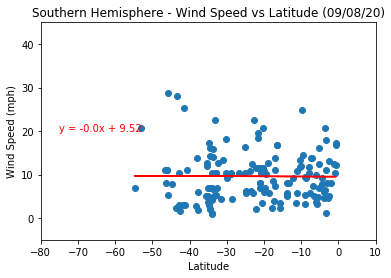

In [21]:
# Calculate the correlation coefficient 
y_axis = southern["Wind Speed"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere - Wind Speed vs Latitude ({datetime.now():%m/%d/%y})")
plt.annotate(line_eq,(-75,20),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,45)
plt.savefig("southern-windspeed-vs-lat.png",dpi=150)
plt.show()